In [1]:
import os

# Đường dẫn đến thư mục dataset
data_dir = r"D:\temp\pbl\trashnet\trashnet\data\dataset-resized"
categories = ["glass", "paper", "cardboard", "plastic", "metal", "trash"]

# Đếm số lượng ảnh trong mỗi thư mục
for category in categories:
    path = os.path.join(data_dir, category)
    print(f"{category}: {len(os.listdir(path))} images")


glass: 501 images
paper: 594 images
cardboard: 403 images
plastic: 482 images
metal: 410 images
trash: 137 images


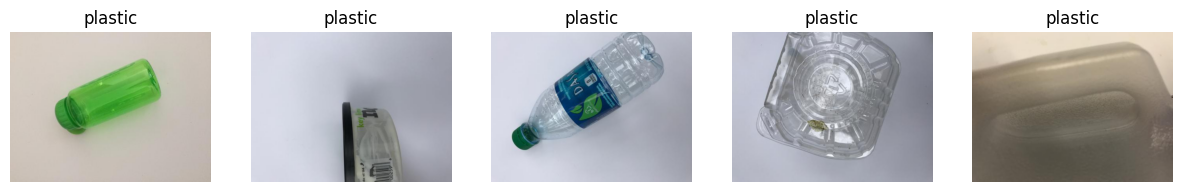

In [2]:
import matplotlib.pyplot as plt
import cv2
import random

def show_sample_images(data_dir, category):
    path = os.path.join(data_dir, category)
    images = os.listdir(path)
    sample_images = random.sample(images, 5)  # Chọn ngẫu nhiên 5 ảnh
    
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển sang định dạng RGB
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(category)
    plt.show()

# Hiển thị ảnh mẫu cho loại rác "plastic"
show_sample_images(data_dir, "plastic")


In [ ]:
import shutil
from sklearn.model_selection import train_test_split

# Thư mục chứa dữ liệu đã chia
output_dir =r"D:\temp\pbl\pbl_2025\smart-trash-bin\data\trashnet_split"
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

# Các thư mục sẽ giữ nguyên
selected_categories = ["paper", "trash", "plastic", "metal"]

# Các thư mục sẽ gộp vào trash
merge_to_trash = ["glass", "cardboard"]

# Đường dẫn thư mục trash
trash_path_test = os.path.join(test_dir, "trash")
trash_path_train = os.path.join(train_dir, "trash")

os.makedirs(trash_path_test, exist_ok=True)
os.makedirs(trash_path_train, exist_ok=True)

# Hàm xoá thư mục rỗng
def delete_empty_dirs(root_dir):
    for dirpath, dirnames, filenames in os.walk(root_dir, topdown=False):
        for dirname in dirnames:
            dir_to_check = os.path.join(dirpath, dirname)
            if not os.listdir(dir_to_check):  # Kiểm tra nếu thư mục rỗng
                os.rmdir(dir_to_check)
                print(f"🗑️ Đã xoá thư mục rỗng: {dir_to_check}")

# Hàm chia dữ liệu
def split_data(source_dir, dest_dir, test_size=0.2):
    os.makedirs(dest_dir, exist_ok=True)

    for category in categories:
        os.makedirs(os.path.join(dest_dir, "train", category), exist_ok=True)
        os.makedirs(os.path.join(dest_dir, "test", category), exist_ok=True)

        files = os.listdir(os.path.join(source_dir, category))
        train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)

        for file in train_files:
            shutil.copy(os.path.join(source_dir, category, file), os.path.join(dest_dir, "train", category, file))

        for file in test_files:
            shutil.copy(os.path.join(source_dir, category, file), os.path.join(dest_dir, "test", category, file))

    for category in merge_to_trash:
        test_path = os.path.join(test_dir, category)
        train_path = os.path.join(train_dir, category)

        if os.path.exists(test_path):
            images = os.listdir(test_path)
            for img in images:
                shutil.move(os.path.join(test_path, img), os.path.join(trash_path_test, img))

            print(f"Đã gộp {len(images)} ảnh từ {category} vào {trash_path_test}")


        if os.path.exists(train_path):
            images = os.listdir(train_path)
            for img in images:
                shutil.move(os.path.join(train_path, img), os.path.join(trash_path_train, img))

            print(f"Đã gộp {len(images)} ảnh từ {category} vào {trash_path_train}")
    
    delete_empty_dirs(test_dir)
    delete_empty_dirs(train_dir)

# Thực hiện chia dữ liệu
split_data(data_dir, output_dir)

Đã gộp 101 ảnh từ glass vào D:\temp\pbl\trashnet_split\test\trash
Đã gộp 400 ảnh từ glass vào D:\temp\pbl\trashnet_split\train\trash
Đã gộp 81 ảnh từ cardboard vào D:\temp\pbl\trashnet_split\test\trash
Đã gộp 322 ảnh từ cardboard vào D:\temp\pbl\trashnet_split\train\trash
🗑️ Đã xoá thư mục rỗng: D:\temp\pbl\trashnet_split\test\cardboard
🗑️ Đã xoá thư mục rỗng: D:\temp\pbl\trashnet_split\test\glass
🗑️ Đã xoá thư mục rỗng: D:\temp\pbl\trashnet_split\train\cardboard
🗑️ Đã xoá thư mục rỗng: D:\temp\pbl\trashnet_split\train\glass


In [8]:
print("Test: \n")
for category in selected_categories:
    path = os.path.join(test_dir, category)
    print(f"{category}: {len(os.listdir(path))} images")

print("\nTrain: \n")
for category in selected_categories:
    path = os.path.join(train_dir, category)
    print(f"{category}: {len(os.listdir(path))} images")

Test: 

paper: 119 images
trash: 210 images
plastic: 97 images
metal: 82 images

Train: 

paper: 475 images
trash: 831 images
plastic: 385 images
metal: 328 images


In [9]:
def downSampling(path):
    if os.path.exists(path):
        # Lấy danh sách tất cả ảnh trong thư mục "trash"
        trash_images = os.listdir(path)

        # Tính số lượng ảnh cần giữ lại (lấy random 1 nửa)
        num_to_keep = len(trash_images) // 2

        # Chọn ngẫu nhiên num_to_keep ảnh từ danh sách
        images_to_keep = random.sample(trash_images, num_to_keep)

        # Xác định danh sách ảnh cần xóa (ảnh còn lại trong danh sách ban đầu)
        images_to_delete = set(trash_images) - set(images_to_keep)

        # Xóa ảnh không được chọn
        for img in images_to_delete:
            img_path = os.path.join(path, img)
            os.remove(img_path)

        print(f"✅ Đã giữ lại {num_to_keep} ảnh và xóa {len(images_to_delete)} ảnh trong thư mục 'trash'.")
    else:
        print("⚠️ Thư mục 'trash' không tồn tại, kiểm tra lại đường dẫn!")

downSampling(trash_path_train)
downSampling(trash_path_test)

✅ Đã giữ lại 415 ảnh và xóa 416 ảnh trong thư mục 'trash'.
✅ Đã giữ lại 105 ảnh và xóa 105 ảnh trong thư mục 'trash'.


In [10]:
print("Test: \n")
for category in selected_categories:
    path = os.path.join(test_dir, category)
    print(f"{category}: {len(os.listdir(path))} images")

print("\nTrain: \n")
for category in selected_categories:
    path = os.path.join(train_dir, category)
    print(f"{category}: {len(os.listdir(path))} images")

Test: 

paper: 119 images
trash: 105 images
plastic: 97 images
metal: 82 images

Train: 

paper: 475 images
trash: 415 images
plastic: 385 images
metal: 328 images
